### Predicting drug response on cell lines from gene expression data with SVMs

In [18]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score

# Step 1: Load and preprocess the dataset 

gene_expression = pd.read_csv("/Users/deeaciobi/Documents/TU:e/Machine learning for medical imaging and biology/data/RNA_expression_curated.csv", sep=',', header=0, index_col=0)
drug_response = pd.read_csv("/Users/deeaciobi/Documents/TU:e/Machine learning for medical imaging and biology/data/drug_response_curated.csv", sep=',', header=0, index_col=0)

X = gene_expression.values  
y = (drug_response.values > 0).astype(int)  # Convert drug response to binary labels

# Step 2: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

y_train = y_train.ravel()
y_test = y_test.ravel()

# Step 3: Define a grid of hyper-parameters to search over
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': [0.01, 0.1, 1],
    'kernel': ['rbf', 'linear']
}

# Step 4: Use GridSearchCV to perform cross-validation and find the best hyper-parameters
svm = SVC()
grid_search = GridSearchCV(svm, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Step 5: Train the SVM classifier with the best parameters
best_svm = grid_search.best_estimator_

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate precision
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

report = classification_report(y_test,y_pred)
print(report)


Accuracy: 0.7297297297297297
Precision: 0.4
              precision    recall  f1-score   support

           0       0.85      0.79      0.82        29
           1       0.40      0.50      0.44         8

    accuracy                           0.73        37
   macro avg       0.63      0.65      0.63        37
weighted avg       0.75      0.73      0.74        37



### Random forests

In [31]:
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# Step 1: Load and preprocess the dataset 

gene_expression = pd.read_csv("/Users/deeaciobi/Documents/TU:e/Machine learning for medical imaging and biology/data/RNA_expression_curated.csv", sep=',', header=0, index_col=0)
drug_response = pd.read_csv("/Users/deeaciobi/Documents/TU:e/Machine learning for medical imaging and biology/data/drug_response_curated.csv", sep=',', header=0, index_col=0)

X = gene_expression.values  
y = (drug_response.values > 0).astype(int)  # Convert drug response to binary labels

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert y to 1-dimensional array
y_train = y_train.ravel()
y_test = y_test.ravel()


# Random Forest Classifier
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'max_features': ['auto','sqrt'],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [2,3,10], 
    'min_samples_split': [2,3,10],
    'criterion': ['entropy','gini'], 
}

random_forest = RandomForestClassifier(bootstrap = True, oob_score = True )


rf = RandomForestClassifier()
rf_grid_search = GridSearchCV(rf, rf_param_grid, cv=5)
rf_grid_search.fit(X_train, y_train)
best_rf = rf_grid_search.best_estimator_

y_pred_rf = best_rf.predict(X_test)
precision_rf = np.sum(y_pred_rf == y_test) / len(y_test)
classification_rep_rf = classification_report(y_test, y_pred_rf, zero_division=1)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_rf)
print("Accuracy:", accuracy)

# Calculate precision
precision = precision_score(y_test, y_pred_rf)
print("Precision:", precision)

report = classification_report(y_test,y_pred_rf)
print(report)




Accuracy: 0.8666666666666667
Precision: 1.0
              precision    recall  f1-score   support

           0       0.86      1.00      0.92        24
           1       1.00      0.33      0.50         6

    accuracy                           0.87        30
   macro avg       0.93      0.67      0.71        30
weighted avg       0.89      0.87      0.84        30



Feature: 0, Score: 0.01137
Feature: 1, Score: 0.01021
Feature: 2, Score: 0.00898
Feature: 3, Score: 0.00857
Feature: 4, Score: 0.00827
Feature: 5, Score: 0.11186
Feature: 6, Score: 0.01299
Feature: 7, Score: 0.00901
Feature: 8, Score: 0.03636
Feature: 9, Score: 0.01070
Feature: 10, Score: 0.00869
Feature: 11, Score: 0.01060
Feature: 12, Score: 0.00810
Feature: 13, Score: 0.00856
Feature: 14, Score: 0.00731
Feature: 15, Score: 0.01014
Feature: 16, Score: 0.00786
Feature: 17, Score: 0.06772
Feature: 18, Score: 0.00848
Feature: 19, Score: 0.05484
Feature: 20, Score: 0.02222
Feature: 21, Score: 0.00968
Feature: 22, Score: 0.04773
Feature: 23, Score: 0.00904
Feature: 24, Score: 0.00898
Feature: 25, Score: 0.01006
Feature: 26, Score: 0.00972
Feature: 27, Score: 0.00860
Feature: 28, Score: 0.04792
Feature: 29, Score: 0.11186
Feature: 30, Score: 0.00898
Feature: 31, Score: 0.00801
Feature: 32, Score: 0.00862
Feature: 33, Score: 0.00878
Feature: 34, Score: 0.00982
Feature: 35, Score: 0.00851
Fe

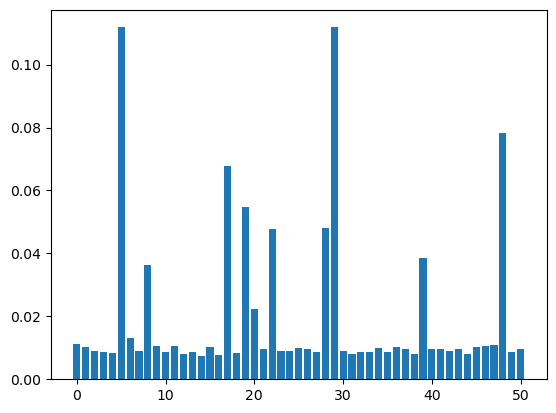

In [33]:
# random forest for feature importance on a classification problem
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot
# define dataset
X, y = make_classification(n_samples=1000, n_features=51, n_informative=5, n_redundant=5, random_state=1)
# define the model
model = RandomForestClassifier()
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

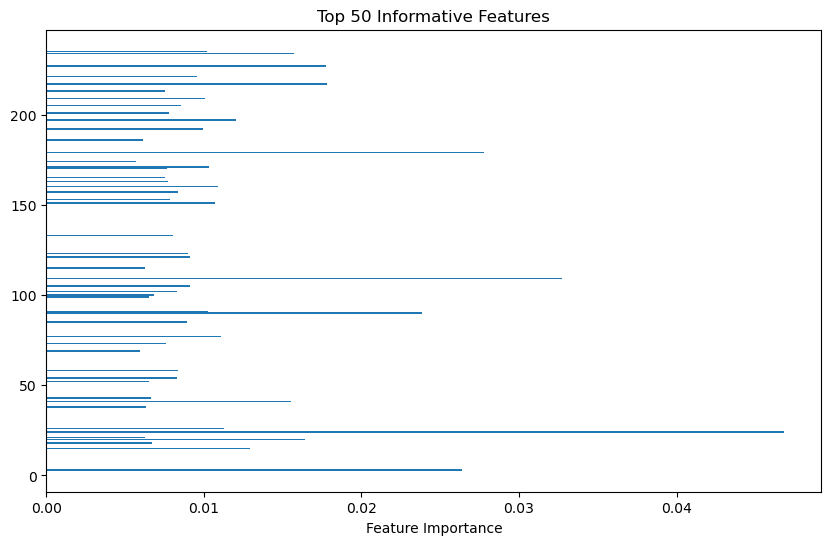

In [25]:
# Feature Importance (Top 50)
best_rf.fit(X_train, y_train)
feature_importances = best_rf.feature_importances_
top_50_indices = np.argsort(feature_importances)[-50:]

# Visualize feature importance
plt.figure(figsize=(10, 6))
plt.barh(top_50_indices, feature_importances[top_50_indices])
plt.xlabel('Feature Importance')
plt.title('Top 50 Informative Features')
plt.show()
